In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

In [5]:
data=pd.read_csv("mcdonalds.csv")

In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Exploring the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder





# Handling missing values (example: filling with mean/mode/median or dropping)
data = data.dropna()  # This will drop rows with any missing values




In [11]:
MD_x = data.iloc[:, 0:11]

In [12]:
MD_x_binary = (MD_x == "Yes").astype(int)

In [13]:
column_means = MD_x_binary.mean().round(2)

print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [64]:
df=MD_x_binary

In [65]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [84]:
from sklearn.decomposition import PCA
pca = PCA()

comp = pca.fit_transform(df)
comp.shape

(1453, 11)

In [85]:
comp = pd.DataFrame(comp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11'])
comp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Project data onto the first two principal components
MD_pca_2d = MD_pca[:, :2]

# Assuming `MD_x_binary` contains the original data
components_2d = pca.components_[:2].T


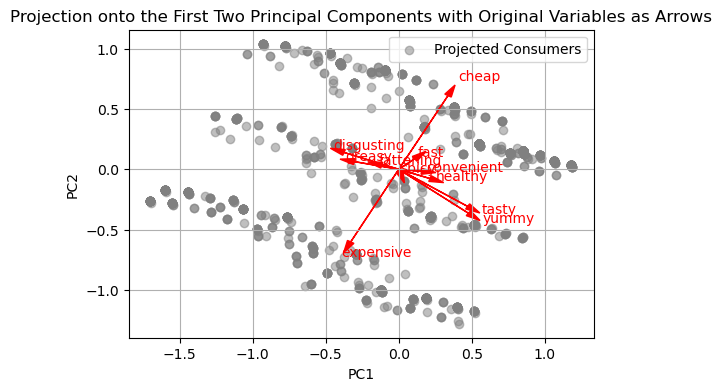

In [78]:
plt.figure(figsize=(6, 4))

# Scatter plot of the projected data
plt.scatter(MD_pca_2d[:, 0], MD_pca_2d[:, 1], color='grey', alpha=0.5, label='Projected Consumers')

# Plot arrows for the original segmentation variables
for i, (comp, name) in enumerate(zip(components_2d, MD_x_binary.columns)):
    plt.arrow(0, 0, comp[0], comp[1], head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(comp[0] * 1.2, comp[1] * 1.2, name, color='red')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection onto the First Two Principal Components with Original Variables as Arrows')
plt.grid()
plt.legend()
plt.show()


In [79]:
import seaborn as sns

In [80]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances_argmin_min


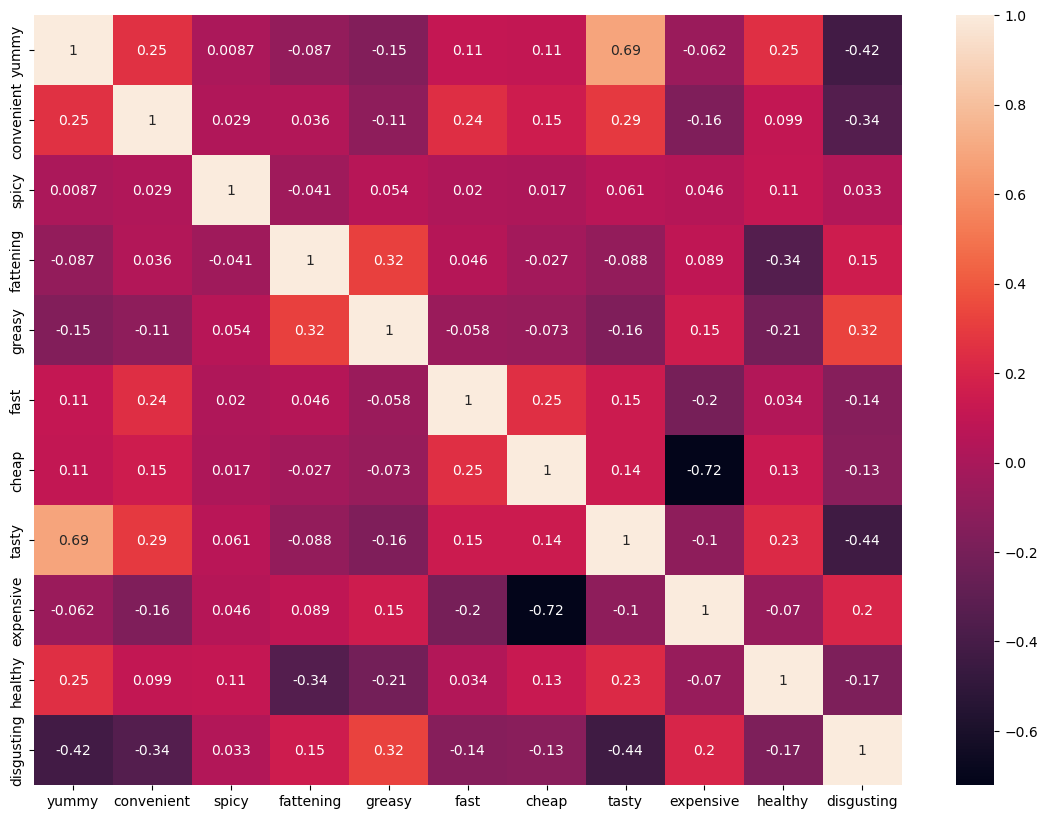

In [70]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True);

# segment extraction using k-means clustring

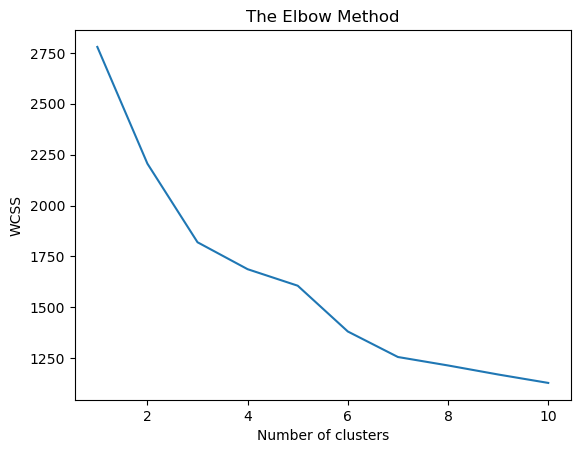

In [73]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
comp.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.425367,0.219079,-0.663255,-0.401300,-0.201705,0.389767,-0.211982,-0.163235,-0.181007,-0.515706,0.567074
1,0.218638,-0.388190,0.730827,-0.094724,-0.044669,0.086596,-0.095877,0.034756,-0.111476,-0.493313,0.500440
2,-0.375415,-0.730435,0.122040,0.692262,-0.839643,0.687406,0.583112,-0.364379,0.322288,-0.061759,-0.242741
3,0.172926,0.352752,0.843795,0.206998,0.681415,0.036133,-0.054284,0.231477,0.028003,0.250678,0.051034
4,-0.187057,0.807610,-0.028537,0.548332,-0.854074,0.097305,-0.457043,-0.171758,0.074409,-0.031897,-0.082245


KMeans(n_clusters=4, random_state=42)

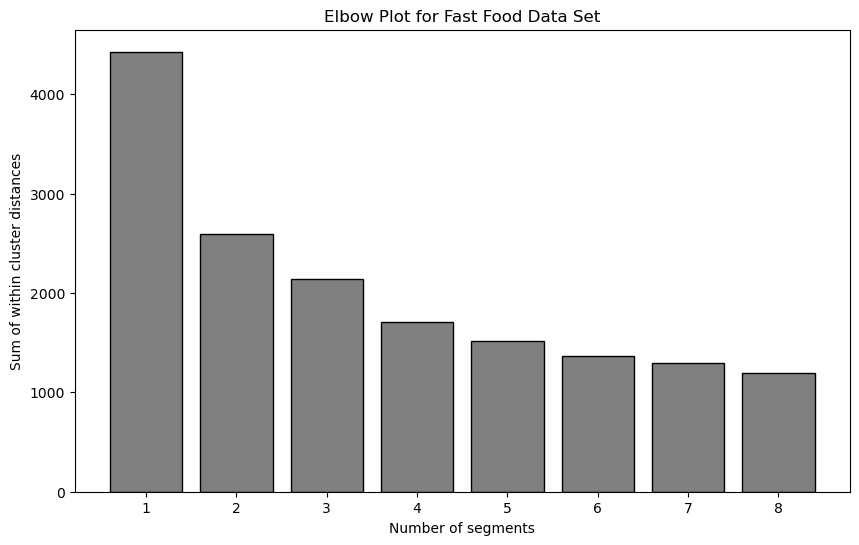

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_kmeans_elbow(data, max_clusters=8):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, max_clusters + 1), wcss, color='grey', edgecolor='black')
    plt.title('Elbow Plot for Fast Food Data Set')
    plt.xlabel('Number of segments')
    plt.ylabel('Sum of within cluster distances')
    plt.xticks(range(1, max_clusters + 1))
    plt.show()

# Assuming MD_pca is your PCA-transformed data
plot_kmeans_elbow(MD_pca)

In [101]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(comp)

KMeans(n_clusters=4, random_state=42)

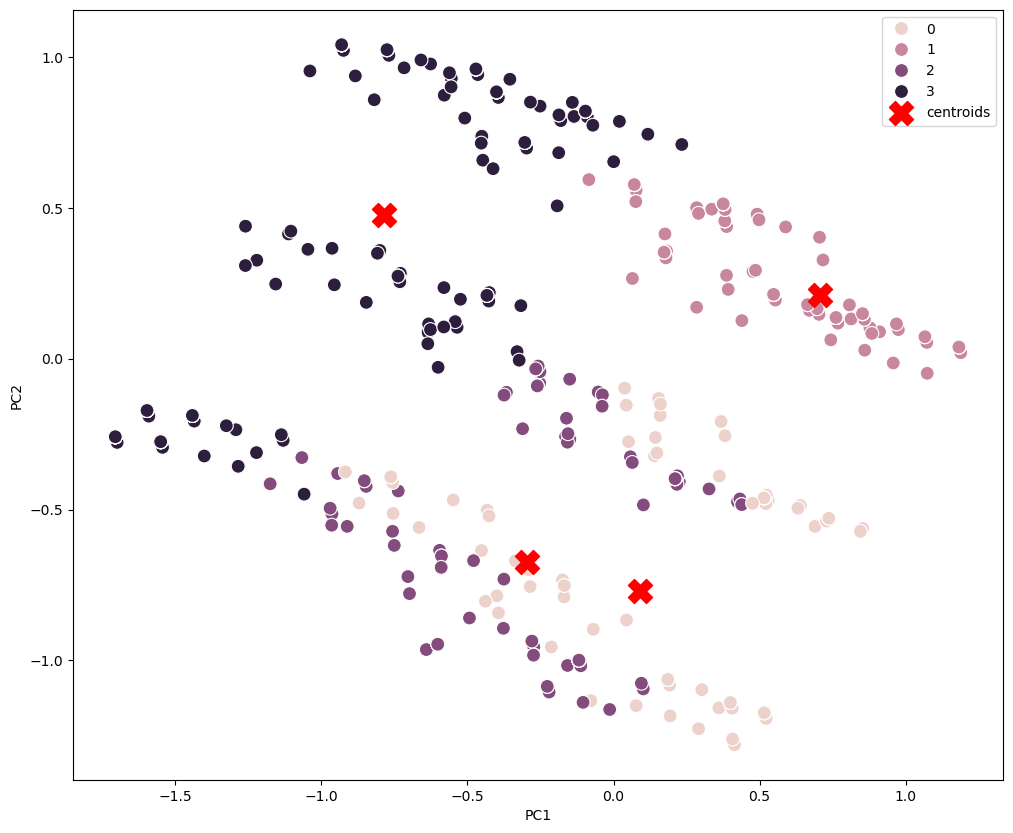

In [88]:
plt.figure(figsize=(12,10))
sns.scatterplot(data=comp, x="PC1", y="PC2", hue=kmeans.labels_, s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=300, label="centroids")
plt.legend()
plt.show()

In [93]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(comp)

# Assuming `df` is your DataFrame where `comp` was derived from
df['cluster_num'] = y_kmeans

# Display the cluster assignments
y_kmeans

array([3, 2, 2, ..., 0, 1, 3])

In [95]:
X = comp.iloc[:, [0,1]].values

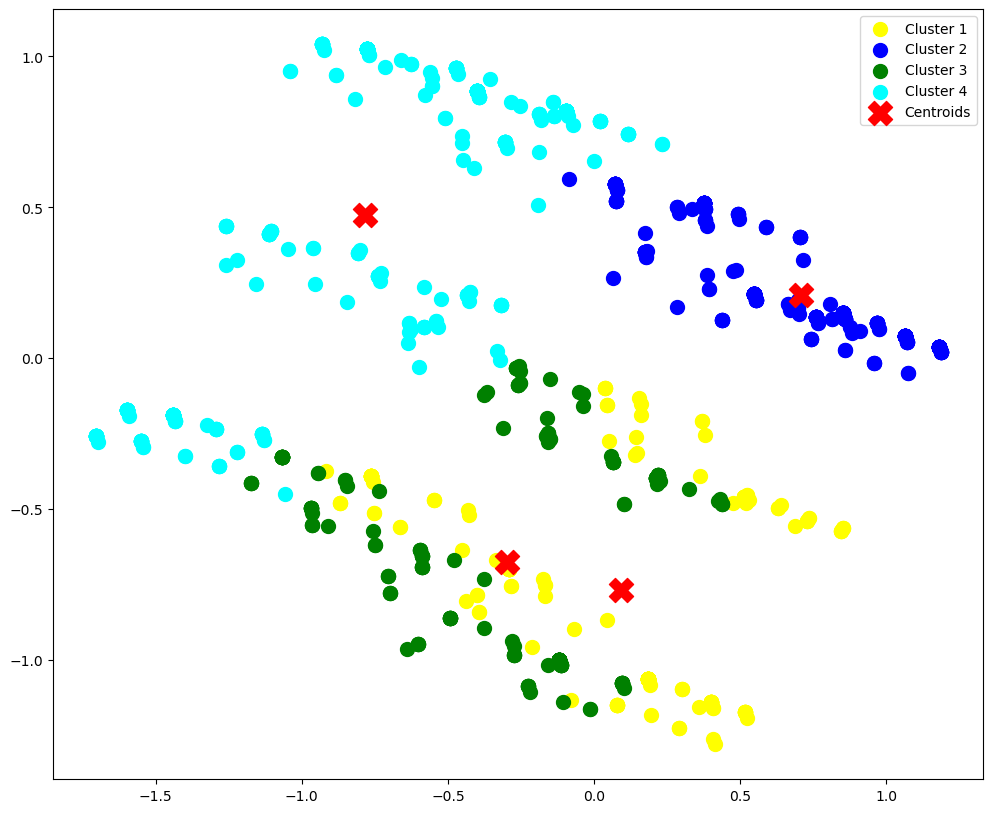

In [96]:
plt.figure(figsize=(12,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s = 300, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

# Profilling the segments

In [108]:
# Add cluster labels to the `comp` DataFrame
comp['cluster'] = kmeans.labels_


In [109]:
# Calculate summary statistics for PCA components
pca_summary = comp.groupby('cluster').agg({
    'PC1': ['mean', 'std', 'median'],
    'PC2': ['mean', 'std', 'median'],
    'PC3': ['mean', 'std', 'median'],
    'PC4': ['mean', 'std', 'median'],
    'PC5': ['mean', 'std', 'median'],
    'PC6': ['mean', 'std', 'median'],
    'PC7': ['mean', 'std', 'median'],
    'PC8': ['mean', 'std', 'median'],
    'PC9': ['mean', 'std', 'median'],
    'PC10': ['mean', 'std', 'median'],
    'PC11': ['mean', 'std', 'median']
})

print("PCA Summary Statistics:")
print(pca_summary)


PCA Summary Statistics:
              PC1                           PC2                           PC3  \
             mean       std    median      mean       std    median      mean   
cluster                                                                         
0        0.092025  0.450286  0.185894 -0.768396  0.336966 -0.753559 -0.489058   
1        0.707714  0.311880  0.761390  0.210074  0.156889  0.149257  0.112547   
2       -0.297827  0.400525 -0.118548 -0.674802  0.333982 -0.691505  0.437965   
3       -0.784817  0.528408 -0.775521  0.475507  0.504714  0.743771 -0.144600   

                                  PC4  ...       PC8       PC9            \
              std    median      mean  ...    median      mean       std   
cluster                                ...                                 
0        0.283698 -0.424819 -0.154308  ...  0.036576  0.023151  0.302116   
1        0.495696 -0.047150  0.007693  ... -0.060904  0.023402  0.265454   
2        0.246036  0.578655 

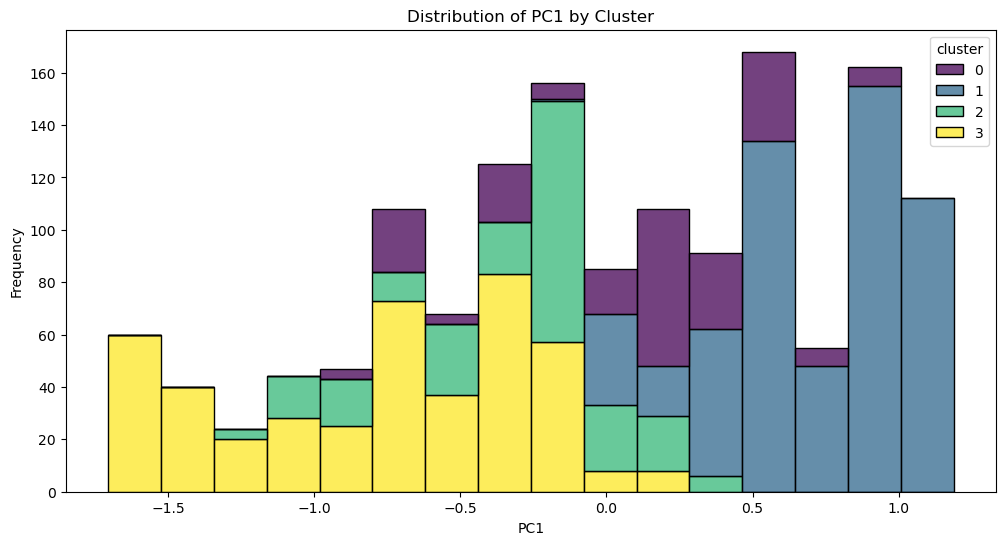

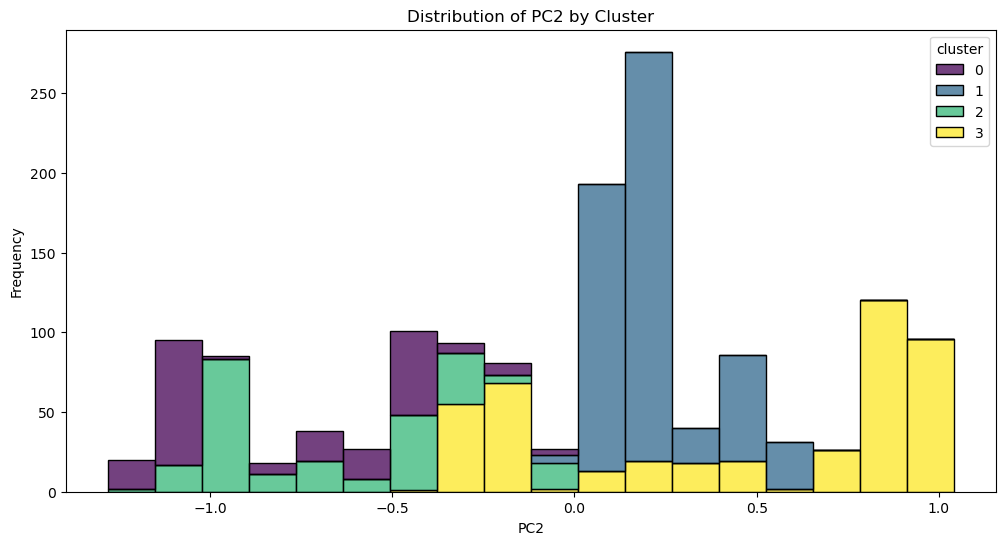

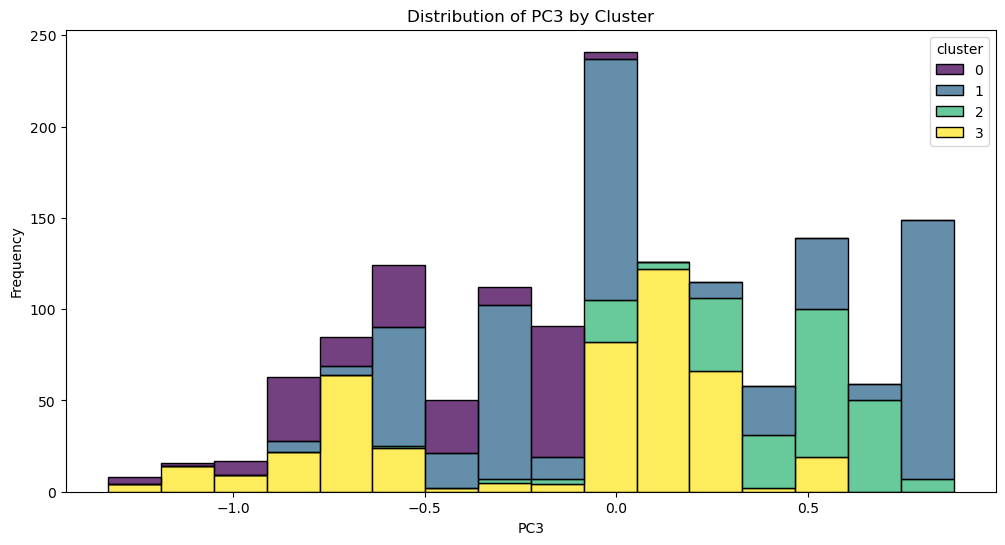

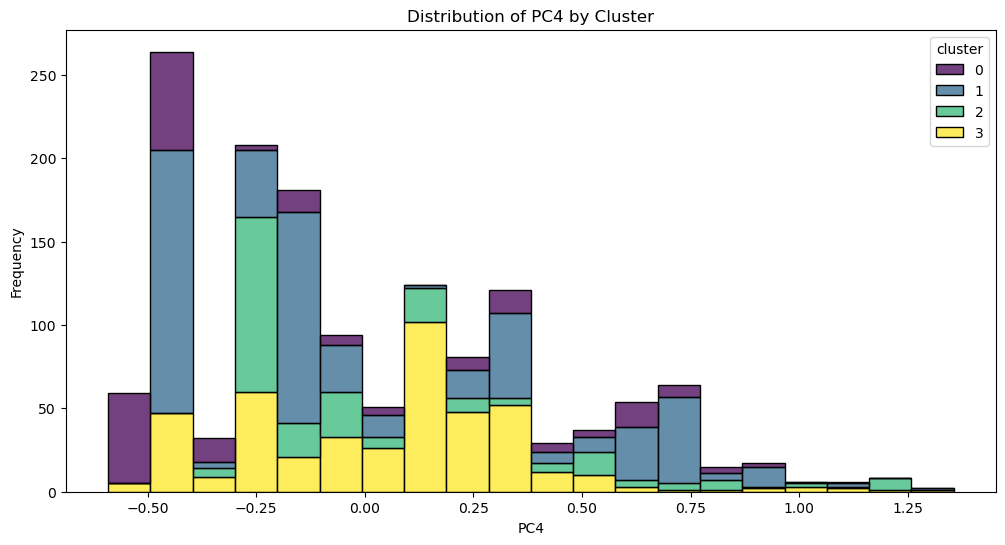

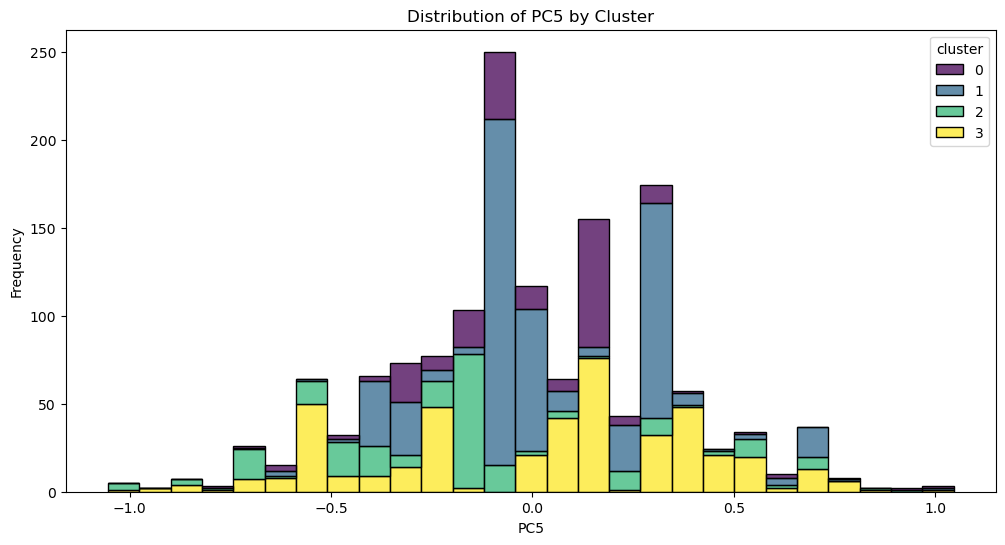

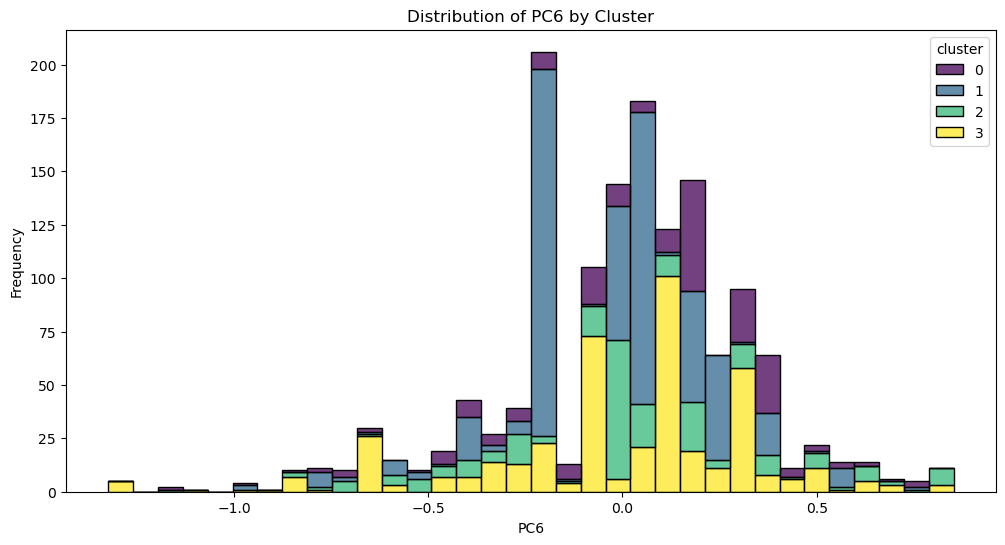

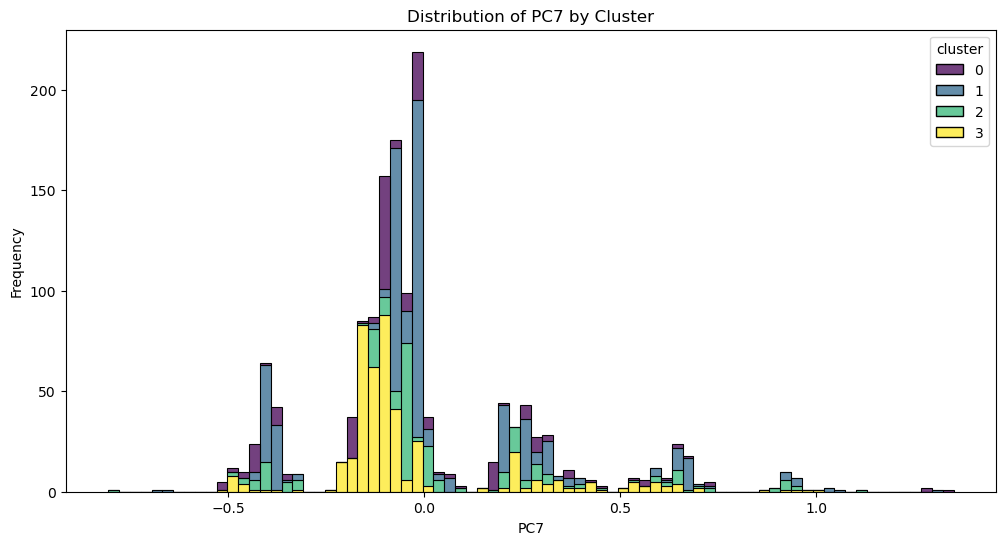

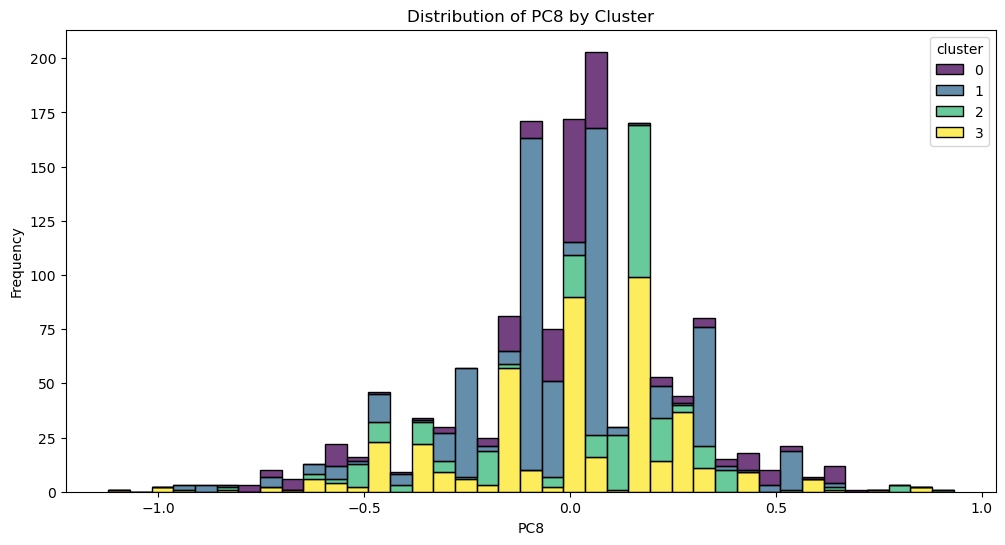

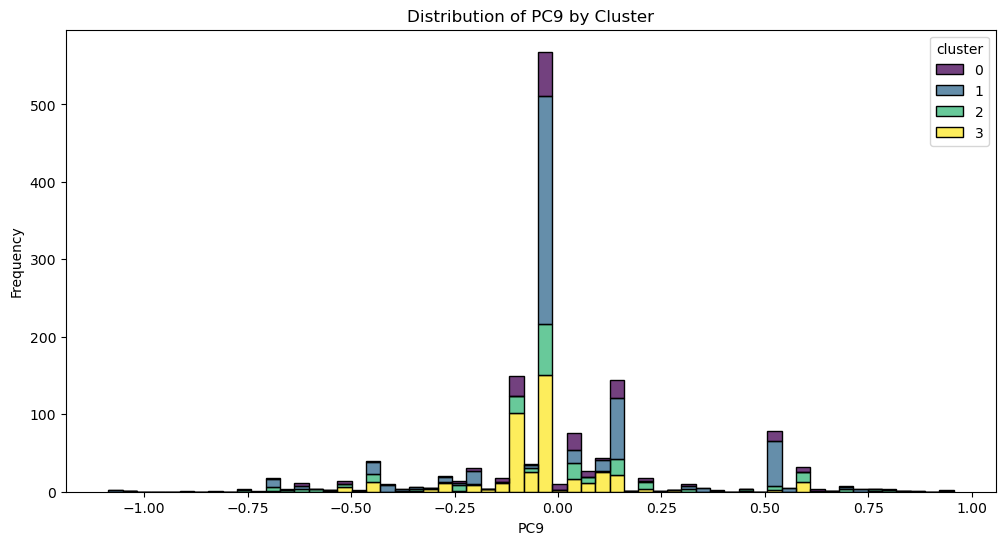

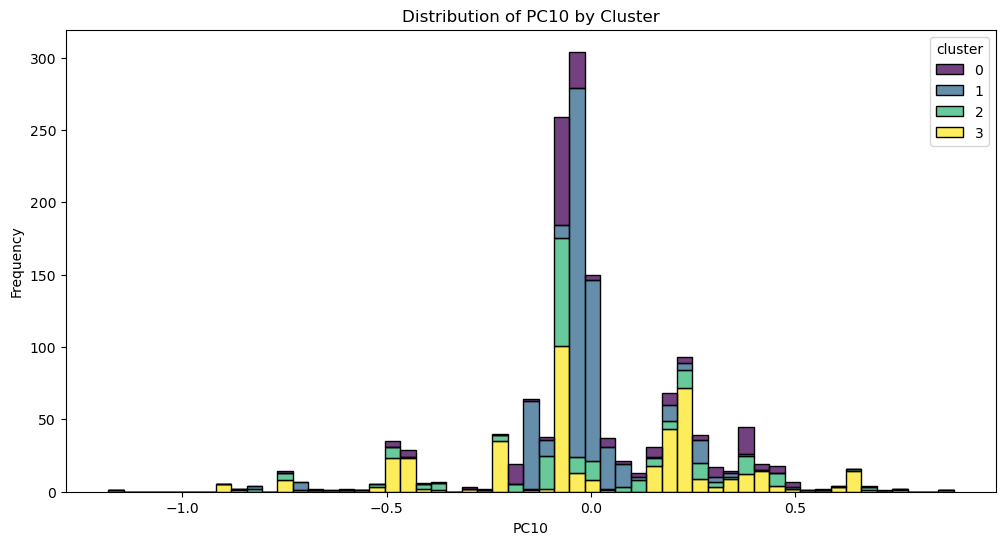

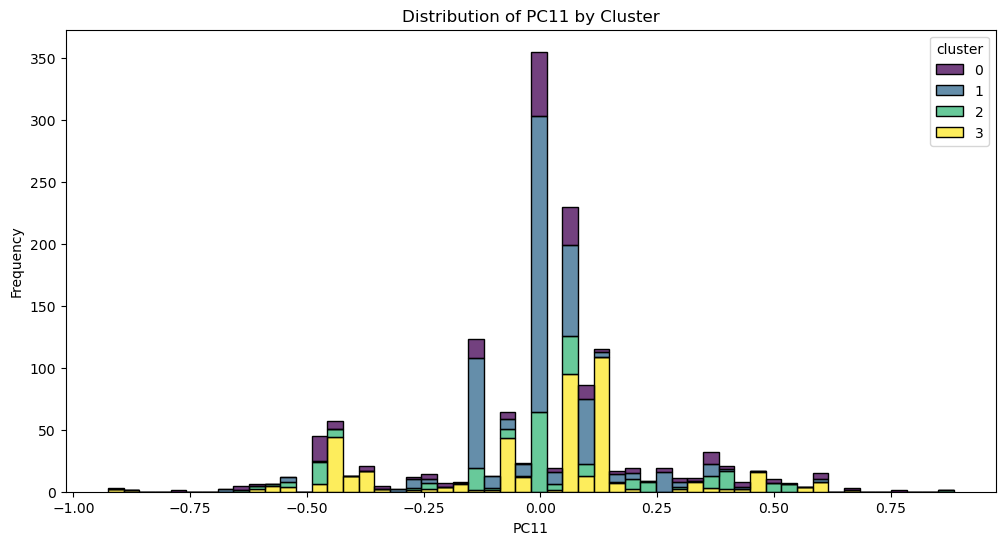

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of PCA components to plot
pca_features = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

# Plot histograms for each PCA component
for pca_feature in pca_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=comp, x=pca_feature, hue='cluster', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {pca_feature} by Cluster')
    plt.xlabel(pca_feature)
    plt.ylabel('Frequency')
    plt.show()


C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


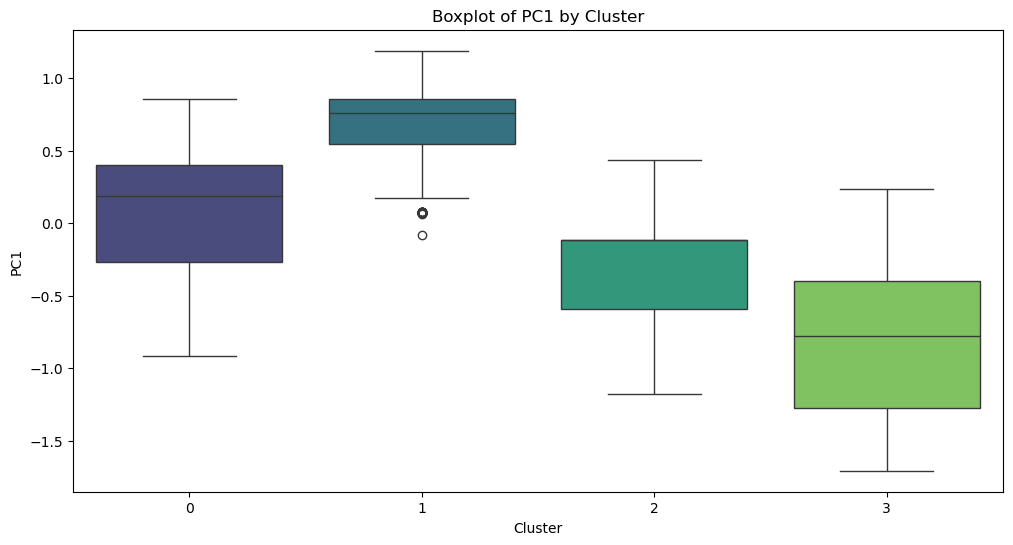

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


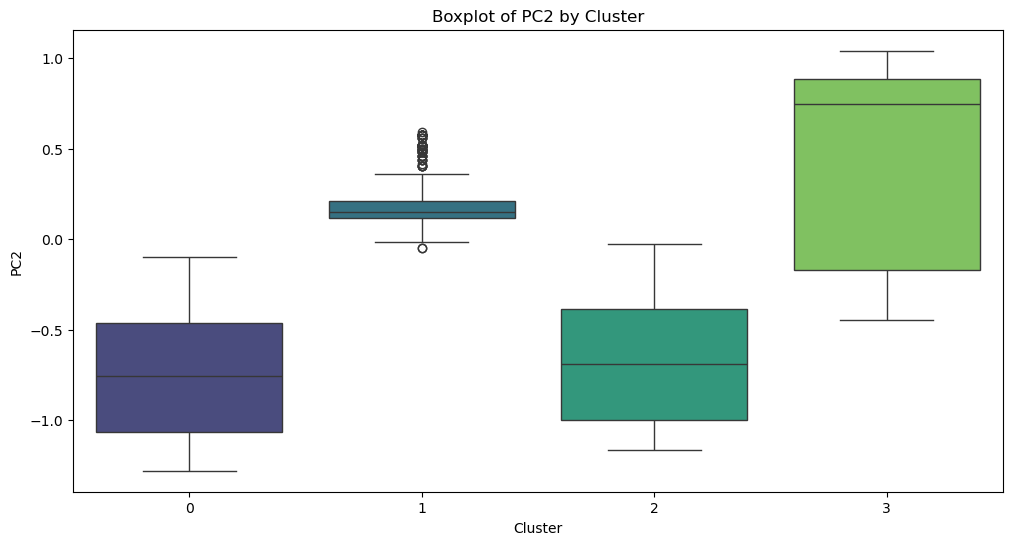

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


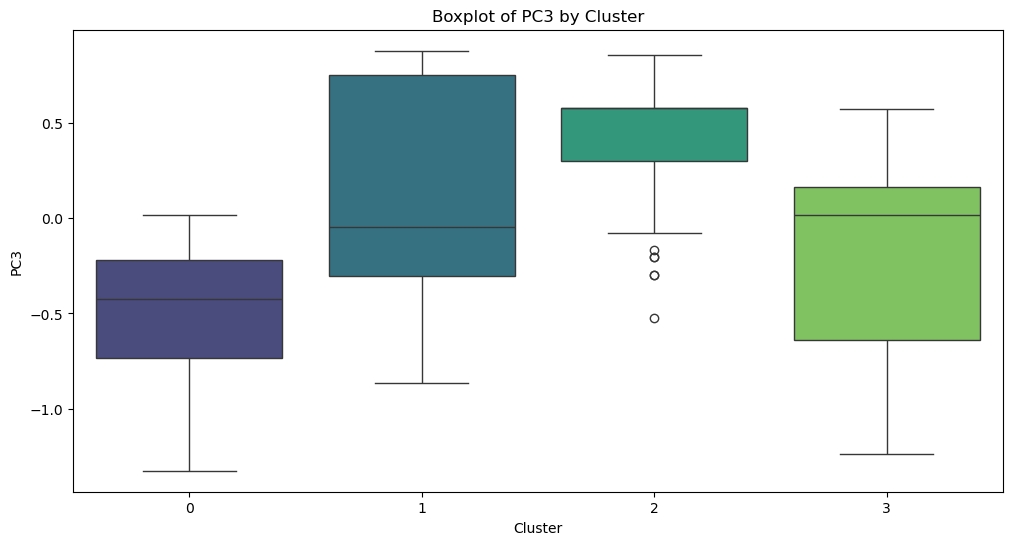

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


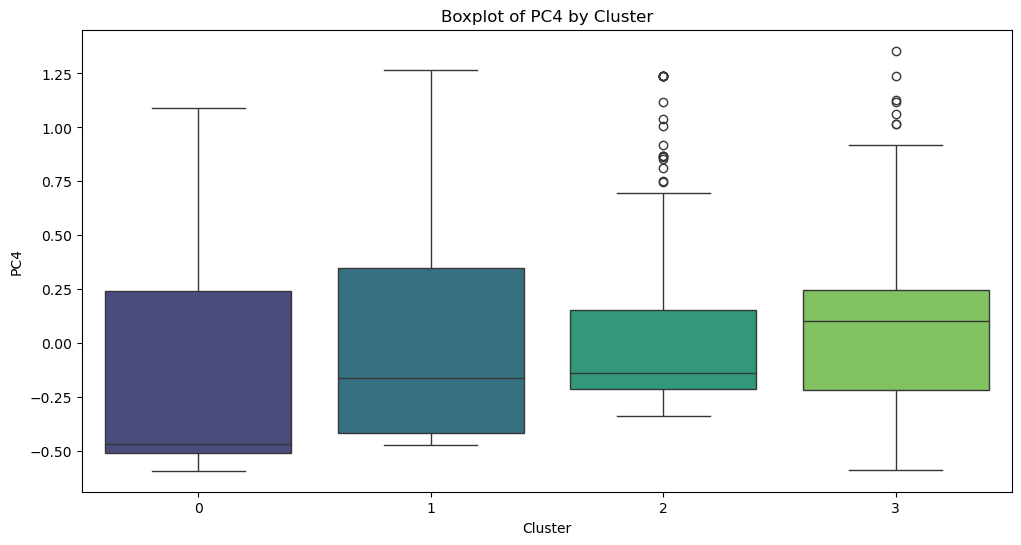

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


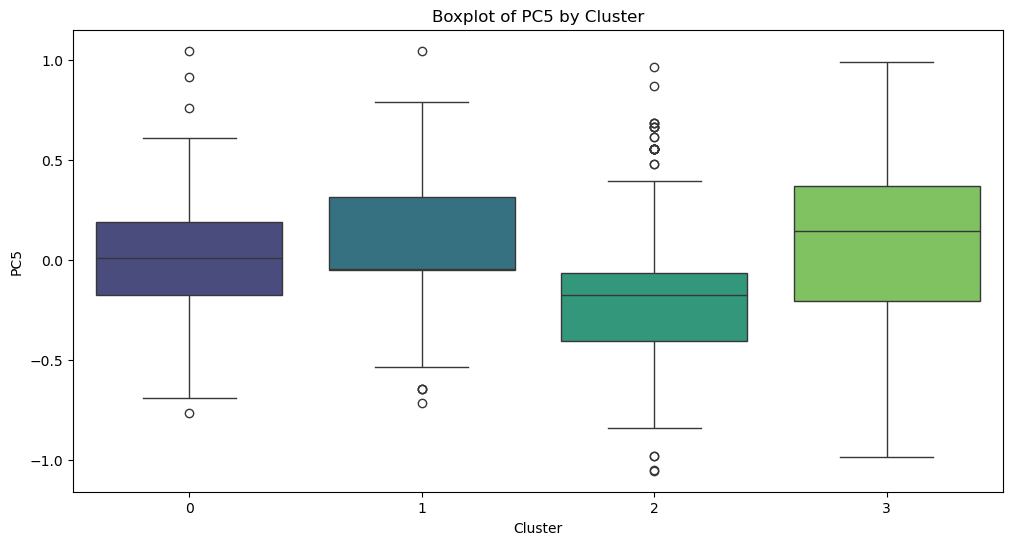

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


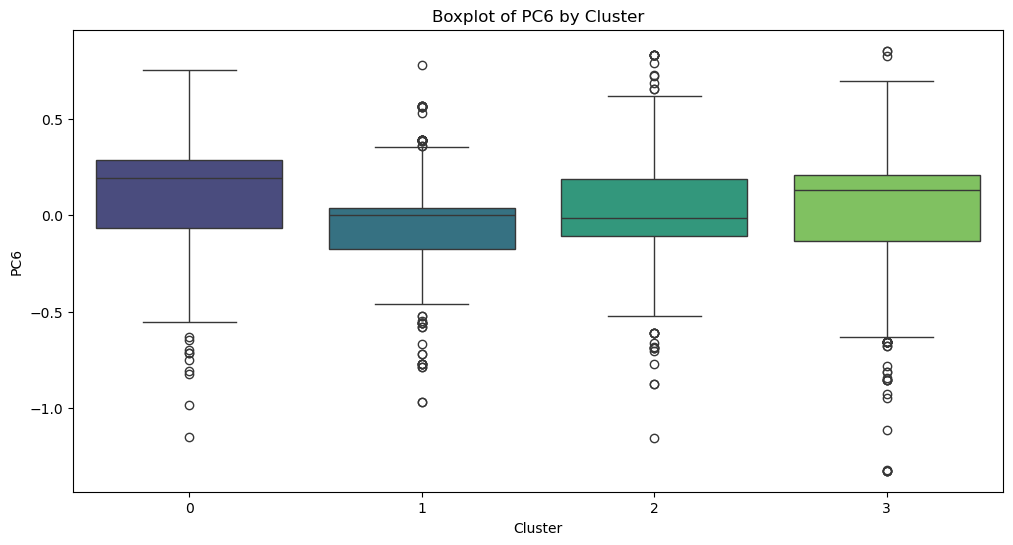

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


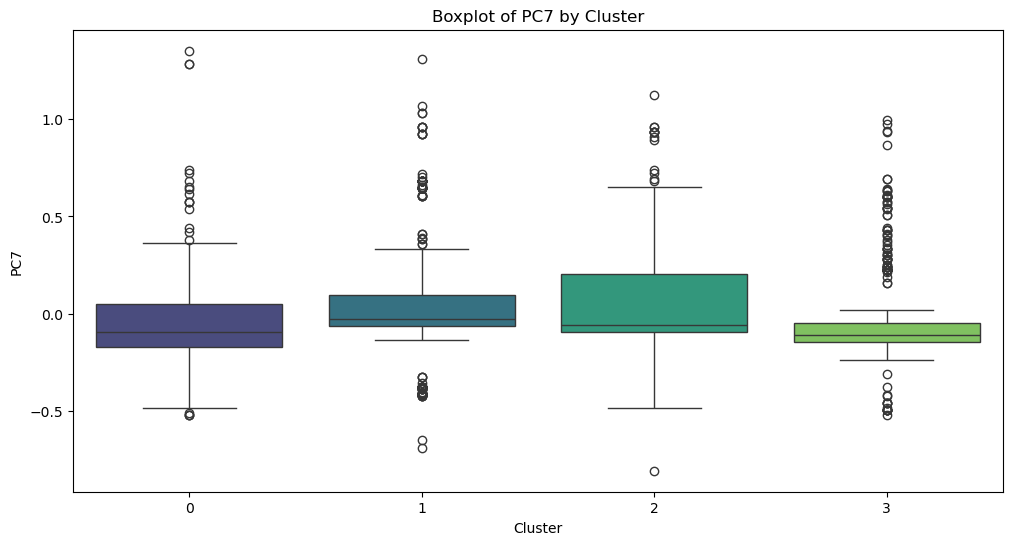

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


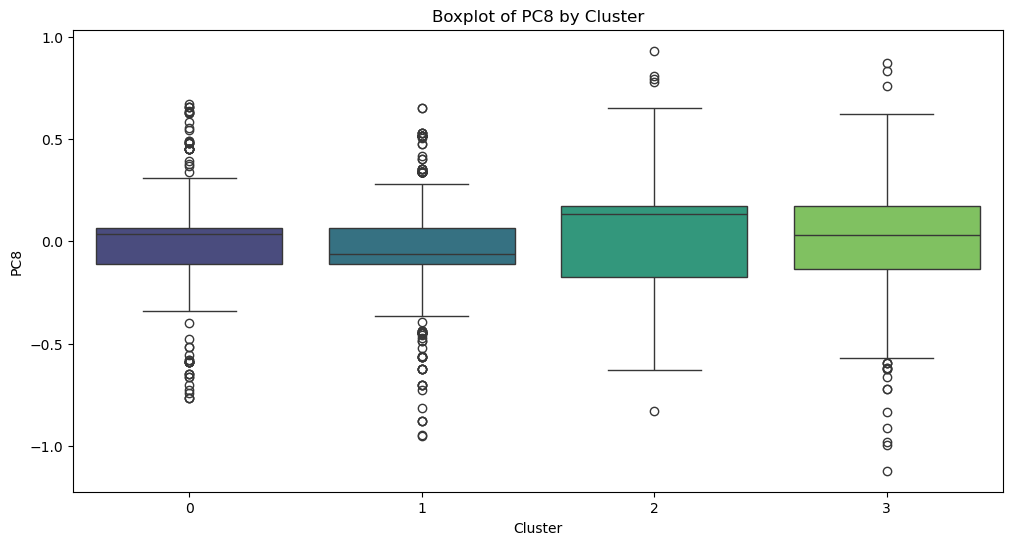

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


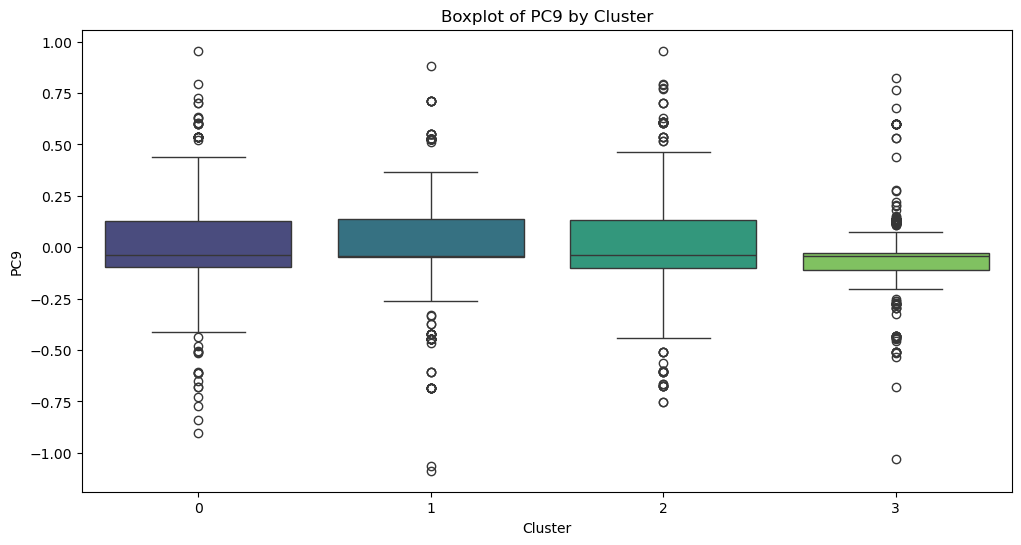

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


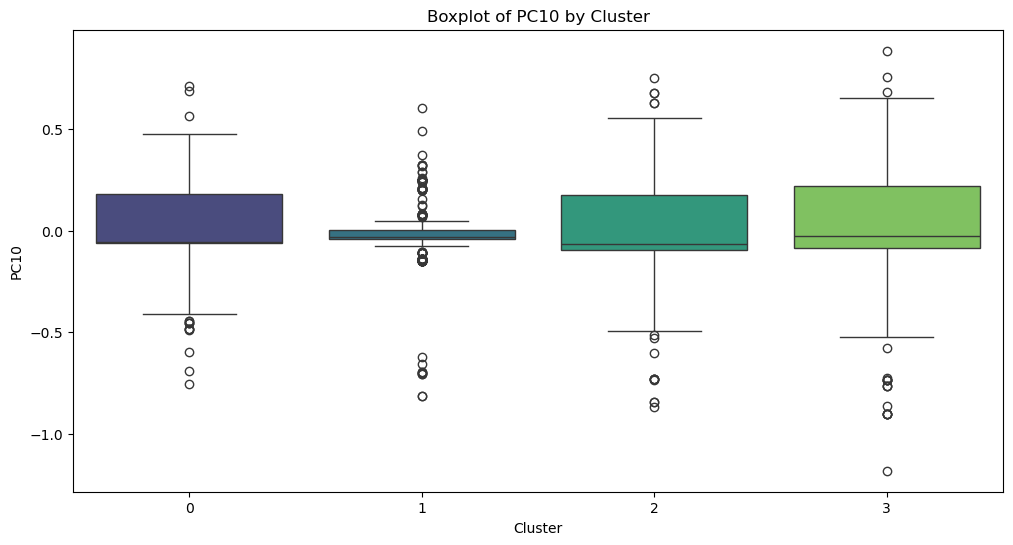

C:\Users\Inzayn\AppData\Local\Temp\ipykernel_1288\413095835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')


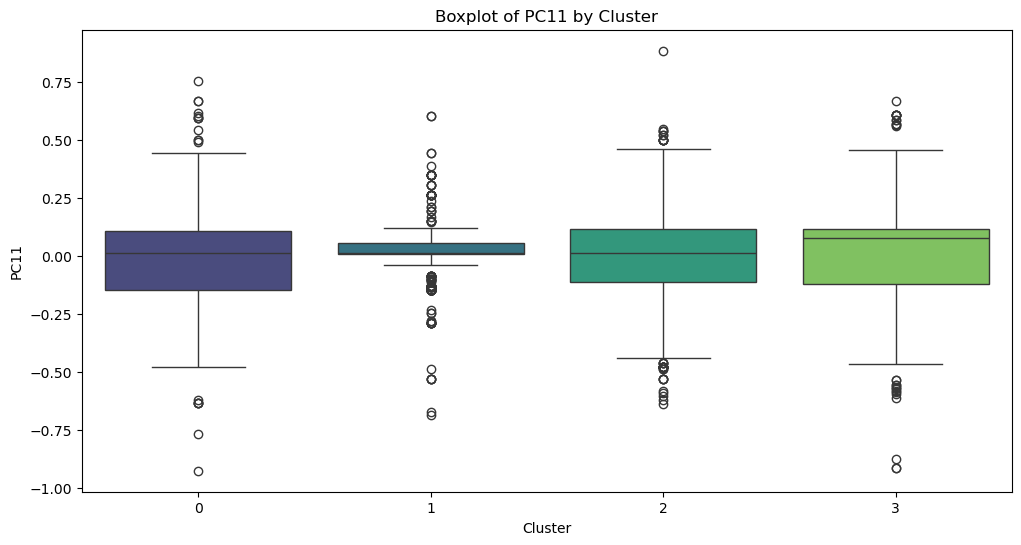

In [111]:
# Plot boxplots for each PCA component
for pca_feature in pca_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=comp, x='cluster', y=pca_feature, palette='viridis')
    plt.title(f'Boxplot of {pca_feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(pca_feature)
    plt.show()


# Overview:

In this analysis, we aimed to understand and characterize the different market segments identified through k-means clustering. Profiling was conducted using Principal Component Analysis (PCA) components and the original features to gain insights into the nature of each segment.

1. PCA Component Profiling:

a. Summary Statistics:

We computed summary statistics for each PCA component (PC1, PC2, etc.) across the clusters. These statistics include:

Mean: The average value of the PCA component within each cluster.
Standard Deviation (Std): The variability or spread of the PCA component values within each cluster.
Median: The middle value of the PCA component values when sorted.
b. Histograms and Boxplots:

To visualize the distribution of PCA components across clusters, we used histograms and boxplots:

Histograms show the distribution of values for each PCA component across different clusters. They help in identifying how the values are spread and whether there is overlap between clusters.
Boxplots provide a summary of the data distribution, highlighting the central tendency, spread, and potential outliers. They reveal how PCA component values differ across clusters, indicating distinct characteristics of each cluster.
Insights:

For instance, if PC1 has a higher mean in Cluster 1, this suggests that Cluster 1 is characterized by stronger influences captured by the first principal component.
Boxplots indicating a low standard deviation for PC2 in Cluster 2 suggest that PC2 values are more consistent within this cluster.
2. Original Feature Profiling:

a. Summary Statistics:

We also analyzed the original features (yummy, convenient, spicy, etc.) by calculating:

Mean: Average value of each feature within each cluster.
Standard Deviation (Std): The spread or variability of the feature values within each cluster.
Median: The middle value of the feature values when sorted.
b. Histograms and Boxplots:

Similar to PCA component profiling, histograms and boxplots were used to visualize the distribution of original features:

Histograms depict how feature values are distributed across clusters.
Boxplots summarize feature value distributions, showing central tendencies, spreads, and outliers.
Insights:

For example, a higher mean for the yummy feature in Cluster 3 suggests that items in this cluster are generally rated higher for "yummy" quality compared to other clusters.
A boxplot showing a wide range of spicy ratings in Cluster 2 indicates significant variability in how "spicy" items in this cluster are perceived.
Conclusion:

The profiling of segments through PCA components and original features provides valuable insights into the characteristics of each cluster. By examining both statistical summaries and visualizations, we can better understand the distinguishing features of each segment, aiding in targeted strategies and decisions.